In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import matplotlib.colors as mcolors

import matplotlib.cm as cm 

In [2]:
df=pd.read_csv('Electric_Vehicle_Population_Data.csv')


- This dataset contains registration records of electric vehicles in the state of Washington, USA.
It provides detailed information about electric vehicle adoption, including vehicle specifications (such as make, model, model year, electric range, and vehicle type), geographic location (county, city, postal code, and legislative district), and policy-related attributes (CAFV eligibility).

- The dataset enables analysis of adoption trends over time, geographic distribution of electric vehicles, consumer preferences across manufacturers and models, and the potential relationship between public policy regions and electric vehicle adoptio

In [3]:
df.isna().sum().sort_values(ascending=False)

Legislative District                                 659
Vehicle Location                                      88
County                                                10
City                                                  10
2020 Census Tract                                     10
Electric Utility                                      10
Postal Code                                           10
Electric Range                                         7
Model                                                  0
Make                                                   0
Model Year                                             0
State                                                  0
VIN (1-10)                                             0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Vehicle Type                                  0
DOL Vehicle ID                                         0
dtype: int64

- what legsilative district ?  
---
legislative District represents the political boundary used for state legislative representation in Washington.
This feature enables analysis of electric vehicle adoption across policy-making regions, helping identify potential relationships between public policy, infrastructure investment, and EV adoption rates.

---

In [4]:
df.describe()

,Postal Code,Model Year,Electric Range,Legislative District,DOL Vehicle ID,2020 Census Tract
count,271103.000000,271113.000000,271106.000000,270454.000000,2.711130e+05,2.711030e+05
mean,98176.923405,2021.995068,39.885639,28.813229,2.449143e+08,5.297202e+10
std,2576.510222,3.056730,78.764355,14.898449,6.365566e+07,1.632879e+09
min,1030.000000,1999.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2021.000000,0.000000,17.000000,2.201288e+08,5.303301e+10
50%,98133.000000,2023.000000,0.000000,32.000000,2.619548e+08,5.303303e+10
75%,98382.000000,2024.000000,33.000000,42.000000,2.781037e+08,5.305394e+10
max,99577.000000,2026.000000,337.000000,49.000000,4.791150e+08,6.601095e+10


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271113 entries, 0 to 271112
Data columns (total 16 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         271113 non-null  object 
 1   County                                             271103 non-null  object 
 2   City                                               271103 non-null  object 
 3   State                                              271113 non-null  object 
 4   Postal Code                                        271103 non-null  float64
 5   Model Year                                         271113 non-null  int64  
 6   Make                                               271113 non-null  object 
 7   Model                                              271113 non-null  object 
 8   Electric Vehicle Type                              271113 non-null  object

In [6]:
df['Legislative District'].value_counts(ascending=False)

Legislative District
41.0    16468
45.0    15132
48.0    14234
1.0     11749
5.0     11371
36.0    10252
46.0     9886
11.0     9751
43.0     9070
37.0     7699
44.0     7690
34.0     7542
18.0     7354
21.0     7033
22.0     6670
32.0     6615
23.0     5723
40.0     5590
26.0     5515
33.0     5368
47.0     5312
31.0     5198
10.0     4986
17.0     4880
39.0     4287
49.0     4027
35.0     4007
42.0     3957
27.0     3838
24.0     3669
28.0     3639
30.0     3521
2.0      3450
8.0      3225
38.0     3122
25.0     3094
6.0      2770
12.0     2698
20.0     2566
4.0      2464
13.0     2140
29.0     2094
14.0     1946
9.0      1814
19.0     1693
16.0     1614
3.0      1463
7.0      1433
15.0      835
Name: count, dtype: int64

In [7]:
df['Legislative District'].unique()

array([23., 26.,  1., 15., 32., 22., 43., 21.,  2., 14., 36., 30., 10.,
       35., 46., 48., 45., 47., 20., 44., 39., 41., 11.,  5., 37., 34.,
       33., 16.,  9., 12., 40., 13., 38.,  6.,  3., nan,  7., 31., 19.,
       17., 18., 49., 24., 25.,  4.,  8., 28., 27., 29., 42.])

In [8]:
df['Legislative District'] = df['Legislative District'].fillna('Unknown')


- Missing values in the Legislative District feature were filled with “Unknown” to preserve records while maintaining analytical transparency .


  - Approximately 659 records contained missing values in the Legislative District feature. Given the categorical and contextual nature of this variable, missing values were filled with “Unknown” to avoid information loss while preserving  analytical integrity.

In [9]:
df.isna().sum().sort_values(ascending=False)

Vehicle Location                                     88
County                                               10
Postal Code                                          10
City                                                 10
Electric Utility                                     10
2020 Census Tract                                    10
Electric Range                                        7
VIN (1-10)                                            0
Model                                                 0
Make                                                  0
Model Year                                            0
State                                                 0
Legislative District                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility     0
Electric Vehicle Type                                 0
DOL Vehicle ID                                        0
dtype: int64

In [10]:
df.drop(columns='VIN (1-10)',inplace=True)

- The VIN (1–10) column contains the first ten characters of the Vehicle Identification Number, which serves as a unique identifier for each registered vehicle. Since this feature functions purely as an identification attribute and does not provide analytical or predictive value for understanding electric vehicle adoption patterns, it was removed during the data preprocessing stage.
Including identifier-based variables in the analysis could introduce unnecessary dimensionality without contributing meaningful insights. Therefore, this column was excluded to ensure a cleaner and more relevant

In [11]:
df.isna().sum().sort_values(ascending=False)

Vehicle Location                                     88
City                                                 10
County                                               10
Electric Utility                                     10
2020 Census Tract                                    10
Postal Code                                          10
Electric Range                                        7
Model                                                 0
Make                                                  0
Model Year                                            0
State                                                 0
Legislative District                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility     0
Electric Vehicle Type                                 0
DOL Vehicle ID                                        0
dtype: int64

In [12]:
df = df.dropna(subset=['Vehicle Location'])


The Vehicle Location feature contains geographic coordinate information (latitude and longitude) used primarily for spatial analysis and visualization. A total of 88 records were identified with missing location data.
Given the very small proportion of missing values relative to the overall dataset size, and considering that geographic coordinates cannot be reliably imputed without introducing artificial bias, these records were removed during preprocessing.

This approach ensures the integrity and accuracy of subsequent spatial analyses while maintaining the overall representativeness of the dataset

In [13]:
df.isna().sum().sort_values(ascending=False)

Electric Range                                       7
City                                                 0
County                                               0
Postal Code                                          0
Model Year                                           0
Make                                                 0
State                                                0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

In [14]:
df = df.dropna(subset=['Electric Range'])


The Electric Range feature is a key numerical variable used for both exploratory analysis and predictive modeling. A total of 7 records contained missing values in this column, representing a negligible proportion of the dataset.

Given the minimal number of missing observations and the importance of preserving numerical integrity for modeling purposes, these records were removed rather than imputed. This approach prevents the introduction of artificial bias while maintaining dataset consistency.

In [15]:
df.isna().sum().sort_values(ascending=False)

County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

# Done cleaning !!!

# Desccriptive : 

In [16]:
df['County'].nunique()

246

In [17]:
df['City'].nunique()

870

In [18]:
df['Model Year'].min()

np.int64(1999)

In [19]:
df['Model Year'].max() 

np.int64(2026)

In [20]:
df['Make'].nunique()

47

In [21]:
df['Make'].value_counts()

Make
TESLA                     110508
CHEVROLET                  19030
NISSAN                     15955
FORD                       14919
KIA                        13617
TOYOTA                     11380
BMW                        11202
HYUNDAI                     9827
RIVIAN                      8509
VOLKSWAGEN                  7349
VOLVO                       7114
JEEP                        6885
AUDI                        5816
CHRYSLER                    3875
MERCEDES-BENZ               3255
HONDA                       3005
SUBARU                      2618
CADILLAC                    2227
PORSCHE                     1953
POLESTAR                    1563
MAZDA                       1498
LEXUS                       1355
MITSUBISHI                  1248
MINI                        1210
FIAT                         852
DODGE                        838
LUCID                        633
GMC                          519
GENESIS                      492
LINCOLN                      433
ACURA

In [22]:
df['Model'].nunique()

184

In [23]:
df['Model'].value_counts()

Model
MODEL Y        57298
MODEL 3        37065
LEAF           13450
BOLT EV         7689
MODEL S         7686
               ...  
WHEEGO             2
ONE                2
CONTINENTAL        2
GRANCABRIO         1
RCV                1
Name: count, Length: 184, dtype: int64

- Geographic Distribution

In [24]:
county_summary = df['County'].value_counts().reset_index()
county_summary.columns = ['County', 'Count']
county_summary['Share (%)'] = (county_summary['Count'] / len(df)) * 100
county_summary.round(2)


,County,Count,Share (%)
0,King,133810,49.37
1,Snohomish,33765,12.46
2,Pierce,22238,8.21
3,Clark,16693,6.16
4,Thurston,9841,3.63
...,...,...,...
241,Nassau,1,0.00
242,Beaver,1,0.00
243,Santa Cruz,1,0.00
244,Boulder,1,0.00


In [25]:
City_summary=df['City'].value_counts().reset_index()
City_summary.columns=['City','Count']
City_summary['share(%)']=(City_summary['Count']/len(df))*100
City_summary.round(2)

,City,Count,share(%)
0,Seattle,42103,15.54
1,Bellevue,13122,4.84
2,Vancouver,10135,3.74
3,Redmond,9242,3.41
4,Bothell,8936,3.30
...,...,...,...
865,Fort Knox,1,0.00
866,Chicago,1,0.00
867,Metaline,1,0.00
868,Atlanta,1,0.00


In [26]:
district_counts = df['Legislative District'].value_counts().reset_index()
district_counts.columns = ['Legislative District', 'EV_Count']

district_counts.head(10)


,Legislative District,EV_Count
0,41.0,16466
1,45.0,15132
2,48.0,14233
3,1.0,11748
4,5.0,11371
5,36.0,10252
6,46.0,9885
7,11.0,9751
8,43.0,9070
9,37.0,7699


In [27]:
ev_per_year = df['Model Year'].value_counts().sort_index()
ev_per_year


Model Year
1999        2
2000        8
2002        1
2003        1
2008       20
2010       23
2011      590
2012     1400
2013     3964
2014     3218
2015     4400
2016     5074
2017     8398
2018    13895
2019    10775
2020    11897
2021    20635
2022    29717
2023    58839
2024    49313
2025    35997
2026    12851
Name: count, dtype: int64

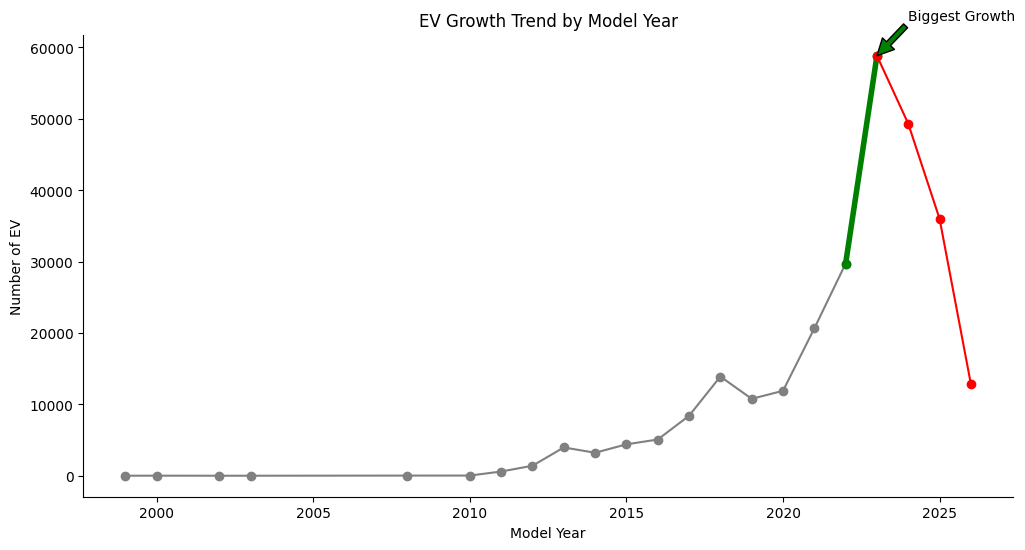

In [28]:
import matplotlib.pyplot as plt

ev_per_year = df['Model Year'].value_counts().sort_index()

years = ev_per_year.index
values = ev_per_year.values

diff = ev_per_year.diff()
max_increase_year = diff.idxmax()

i = list(years).index(max_increase_year)

plt.figure(figsize=(12,6))

plt.plot(years[:i], values[:i], color='gray', marker='o')
plt.plot(years[i-1:i+1], values[i-1:i+1], color='green', marker='o', linewidth=4)
plt.plot(years[i:], values[i:], color='red', marker='o')

plt.annotate('Biggest Growth',
             xy=(years[i], values[i]),
             xytext=(years[i]+1, values[i]+5000),
             arrowprops=dict(facecolor='green'))

plt.title('EV Growth Trend by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Number of EV')


ax = plt.gca()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)



plt.show()


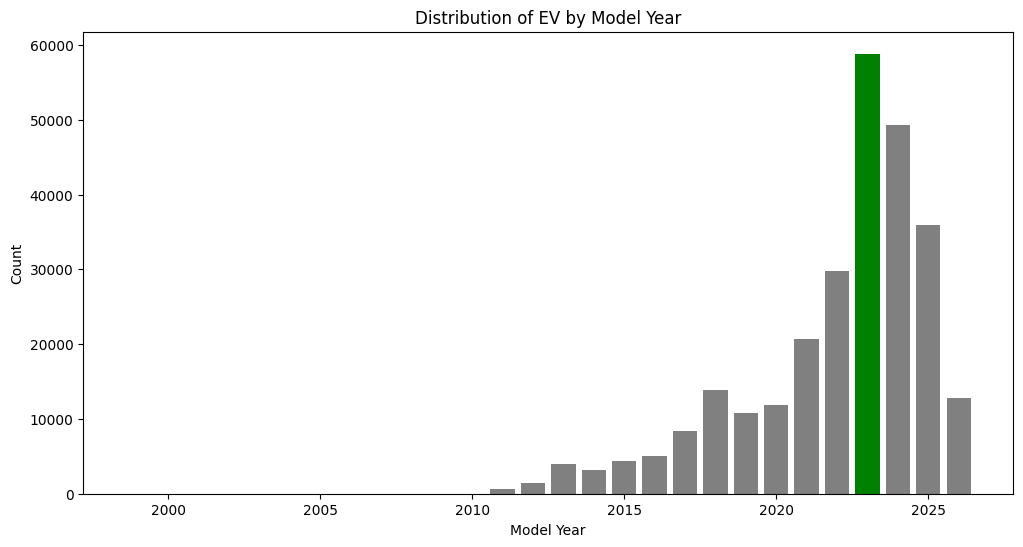

In [29]:

ev_per_year = df['Model Year'].value_counts().sort_index()
max_year = ev_per_year.idxmax()
colors = ['gray' if year != max_year else 'green'
          for year in ev_per_year.index]
plt.figure(figsize=(12,6))
plt.bar(ev_per_year.index,
        ev_per_year.values,
        color=colors)
plt.title('Distribution of EV by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Count')

plt.show()


In [30]:
yearly_ev = df.groupby('Model Year').size().reset_index(name='EV_Count')
yearly_ev = yearly_ev.sort_values('Model Year')
yearly_ev['Cumulative_EV'] = yearly_ev['EV_Count'].cumsum()
yearly_ev.head()



,Model Year,EV_Count,Cumulative_EV
0,1999,2,2
1,2000,8,10
2,2002,1,11
3,2003,1,12
4,2008,20,32


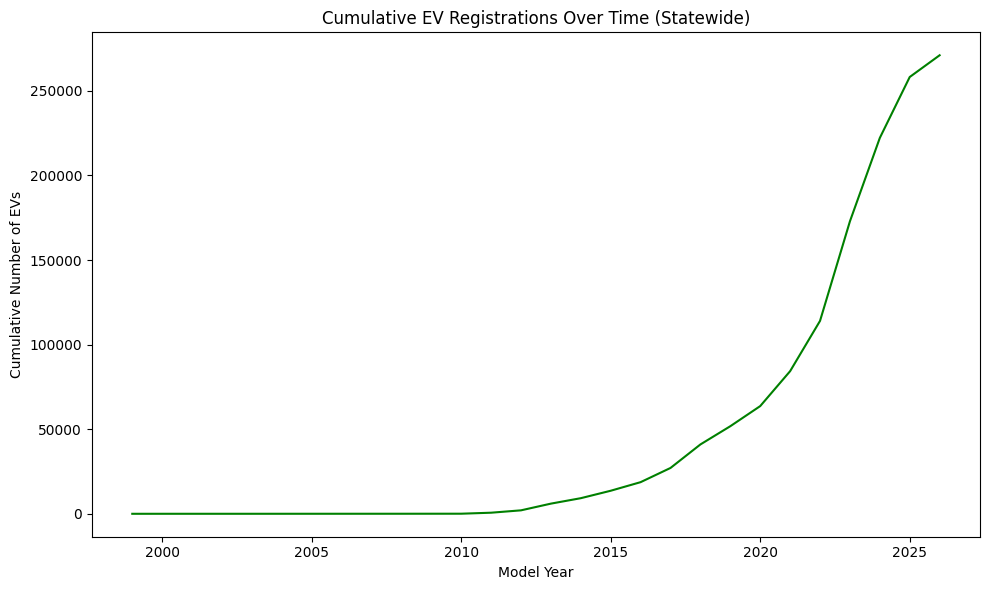

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

plt.plot(yearly_ev['Model Year'], yearly_ev['Cumulative_EV'],color='green')

plt.title('Cumulative EV Registrations Over Time (Statewide)')
plt.xlabel('Model Year')
plt.ylabel('Cumulative Number of EVs')

plt.tight_layout()
plt.show()


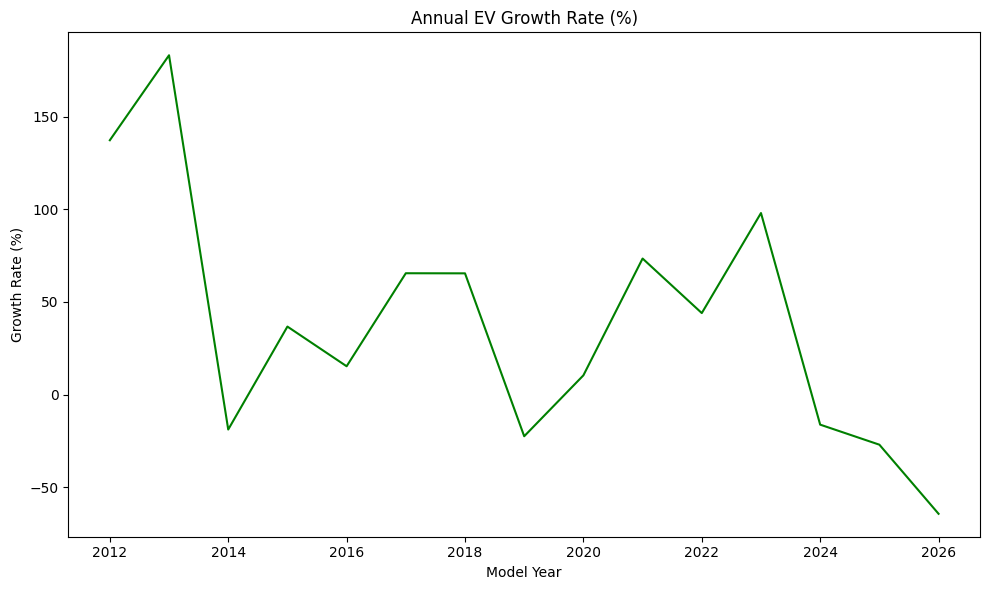

In [32]:
yearly_ev = yearly_ev[yearly_ev['EV_Count'] > 50]

yearly_ev['Growth_Rate (%)'] = yearly_ev['EV_Count'].pct_change() * 100

plt.figure(figsize=(10,6))
plt.plot(yearly_ev['Model Year'], yearly_ev['Growth_Rate (%)'],color='green')

plt.title('Annual EV Growth Rate (%)')
plt.xlabel('Model Year')
plt.ylabel('Growth Rate (%)')
plt.tight_layout()
plt.show()


Annual EV Growth Rate Analysis

The annual growth rate of EV registrations exhibits significant volatility in the early years, which is typical of emerging markets with a small adoption base. Extremely high growth rates in 2012–2013 reflect initial market expansion from a low baseline.

Following a temporary contraction in 2014, the market entered a more stable expansion phase between 2015 and 2020, with consistently positive growth rates. A renewed acceleration is observed between 2021 and 2023, corresponding with the steep rise in cumulative registrations.

The negative growth rates observed in the most recent years are likely attributable to incomplete data for the current model year rather than an actual market contraction. Therefore, these values should be interpreted with caution.

Overall, the EV market demonstrates strong long-term expansion dynamics despite short-term fluctuations.

Cumulative EV Adoption Trend (Statewide)

The cumulative EV adoption curve reveals a clear multi-phase growth pattern. Prior to 2012, EV adoption remained minimal, reflecting the early introduction phase of the technology. Between 2012 and 2016, a gradual increase is observed, indicating early market penetration.

From 2017 onward, the slope of the curve accelerates significantly, suggesting rapid adoption. The most pronounced growth occurs after 2020, where the curve exhibits near-exponential characteristics. No evidence of market saturation is visible in the most recent years, as cumulative registrations continue to increase at an accelerating pace.

This pattern indicates that the EV market remains in a strong expansion phase.

# Growth rate volatility in early years is amplified due to the small base effect.

In [33]:
df['Electric Vehicle Type'].unique()


array(['Battery Electric Vehicle (BEV)',
       'Plug-in Hybrid Electric Vehicle (PHEV)'], dtype=object)

In [34]:
df['Electric Vehicle Type'].value_counts()

Electric Vehicle Type
Battery Electric Vehicle (BEV)            216233
Plug-in Hybrid Electric Vehicle (PHEV)     54785
Name: count, dtype: int64

In [35]:
type_counts = df['Electric Vehicle Type'].value_counts()

type_percent = df['Electric Vehicle Type'].value_counts(normalize=True) * 100

type_summary = pd.DataFrame({
    'Count': type_counts,
    'Percentage (%)': type_percent
})

type_summary.round(2)


,Count,Percentage (%)
Electric Vehicle Type,,
Battery Electric Vehicle (BEV),216233,79.79
Plug-in Hybrid Electric Vehicle (PHEV),54785,20.21


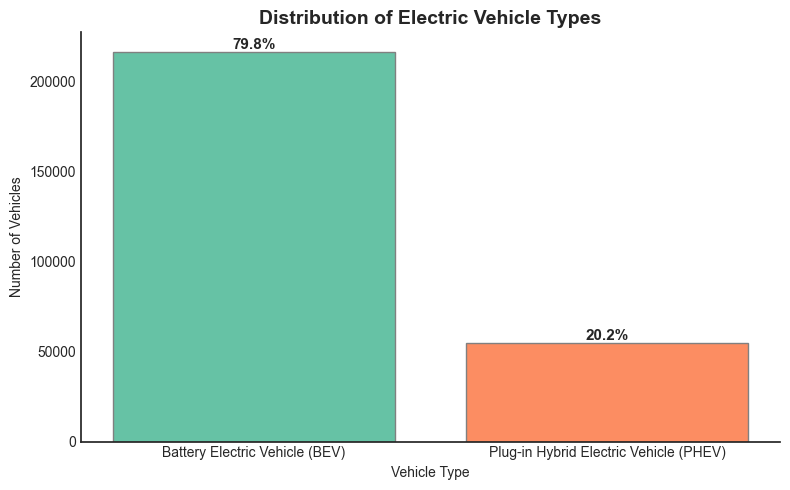

In [36]:


type_counts = df['Electric Vehicle Type'].value_counts()


percentages = (type_counts / type_counts.sum()) * 100

plt.style.use('seaborn-v0_8-white')

plt.figure(figsize=(8,5))

colors = plt.cm.Set2(np.arange(len(type_counts)))

bars = plt.bar(type_counts.index, type_counts.values, color=colors, edgecolor='gray')


ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


for bar, pct in zip(bars, percentages):

    height = bar.get_height()

    plt.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f'{pct:.1f}%',
        ha='center',
        va='bottom',
        fontsize=11,
        fontweight='bold'
    )

plt.title('Distribution of Electric Vehicle Types', fontsize=14, weight='bold')

plt.xlabel('Vehicle Type')
plt.ylabel('Number of Vehicles')

plt.tight_layout()

plt.show()


In [37]:
year_type = df.groupby(['Model Year','Electric Vehicle Type']).size().reset_index(name='Count')

year_type_pivot = year_type.pivot(index='Model Year',
                                   columns='Electric Vehicle Type',
                                   values='Count').fillna(0)

year_type_pivot


Electric Vehicle Type,Battery Electric Vehicle (BEV),Plug-in Hybrid Electric Vehicle (PHEV)
Model Year,,
1999,2.0,0.0
2000,8.0,0.0
2002,1.0,0.0
2003,1.0,0.0
2008,20.0,0.0
2010,21.0,2.0
2011,533.0,57.0
2012,611.0,789.0
2013,2461.0,1503.0


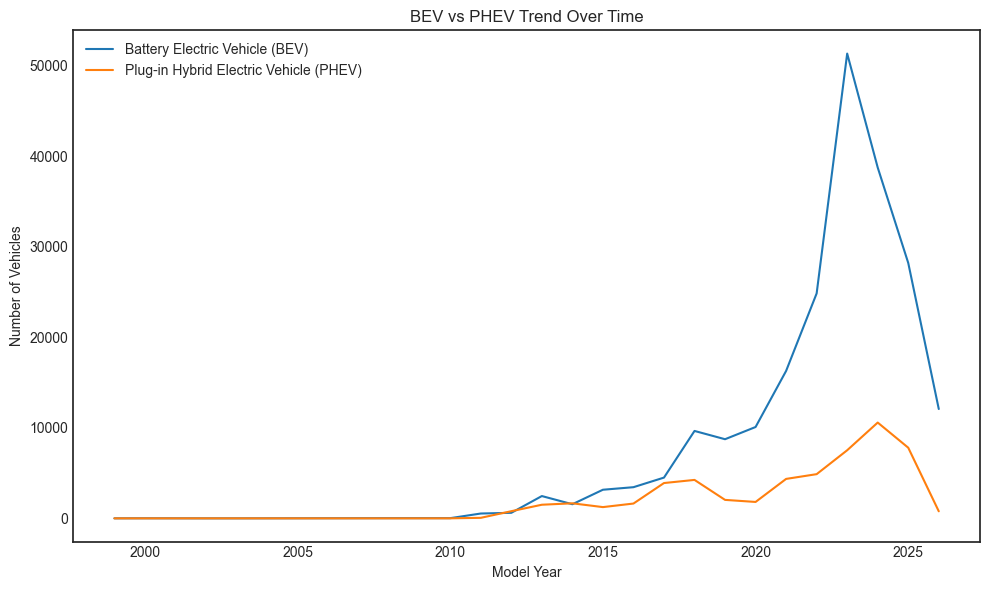

In [38]:
plt.figure(figsize=(10,6))

for col in year_type_pivot.columns:
    plt.plot(year_type_pivot.index, year_type_pivot[col])

plt.title('BEV vs PHEV Trend Over Time')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles')
plt.legend(year_type_pivot.columns)

plt.tight_layout()
plt.show()


Vehicle Type Distribution Analysis

The distribution of electric vehicle types indicates a clear dominance of Battery Electric Vehicles (BEVs) in the market. BEVs account for 216,233 registrations, representing approximately 79.79% of the total EV fleet. In contrast, Plug-in Hybrid Electric Vehicles (PHEVs) constitute 54,785 registrations, or 20.21% of the market.

This significant gap suggests that the market has largely transitioned beyond hybrid adoption and is strongly oriented toward fully electric vehicles. The high proportion of BEVs reflects increasing consumer confidence in battery technology, extended driving range, and the availability of charging infrastructure.

Overall, the data indicates that the EV market is no longer in a transitional hybrid phase but has moved decisively toward full electrification.

BEV vs PHEV Trend Over Time

The figure illustrates the annual trend in the number of Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) over time.

Overall, both BEVs and PHEVs show an increasing trend, indicating growing adoption of electric vehicles. However, BEVs experienced significantly faster growth compared to PHEVs.

In the early years (before 2011), both vehicle types had very low adoption, reflecting the limited availability and early stage of EV technology. Starting around 2012, both categories began to grow, with BEVs increasing more rapidly.

Between 2017 and 2023, BEVs experienced substantial growth, reaching a peak of over 50,000 vehicles in 2023. This sharp increase suggests strong consumer preference for fully electric vehicles, likely driven by improvements in battery technology, charging infrastructure, and government incentives.

PHEVs also increased during this period but at a slower rate, peaking at around 10,000 vehicles in 2024. Compared to BEVs, PHEVs maintained a smaller share of the EV market.

After 2023, both BEVs and PHEVs show a decline. This decrease may be due to incomplete recent-year data or market adjustments.

In summary, the results indicate that BEVs have become the dominant electric vehicle type and are driving the overall growth of the EV market.

In [39]:
top_make = df['Make'].value_counts().head(10)

top_make


Make
TESLA         110508
CHEVROLET      19030
NISSAN         15955
FORD           14919
KIA            13617
TOYOTA         11380
BMW            11202
HYUNDAI         9827
RIVIAN          8509
VOLKSWAGEN      7349
Name: count, dtype: int64

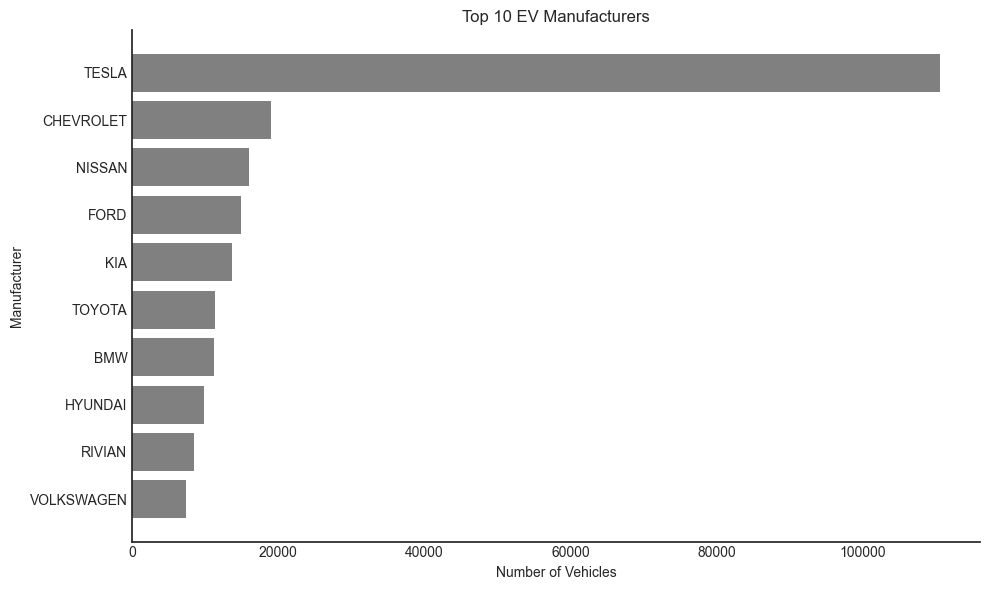

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

plt.barh(top_make.index, top_make.values,color='gray')
ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('Top 10 EV Manufacturers')
plt.xlabel('Number of Vehicles')
plt.ylabel('Manufacturer')

plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()


In [41]:
market_share = (top_make.iloc[0] / len(df)) * 100
market_share.round(2)


np.float64(40.78)

In [42]:
top_model = df['Model'].value_counts().head(10)

top_model


Model
MODEL Y           57298
MODEL 3           37065
LEAF              13450
BOLT EV            7689
MODEL S            7686
MODEL X            6636
MUSTANG MACH-E     6217
ID.4               5951
IONIQ 5            5603
WRANGLER           4972
Name: count, dtype: int64

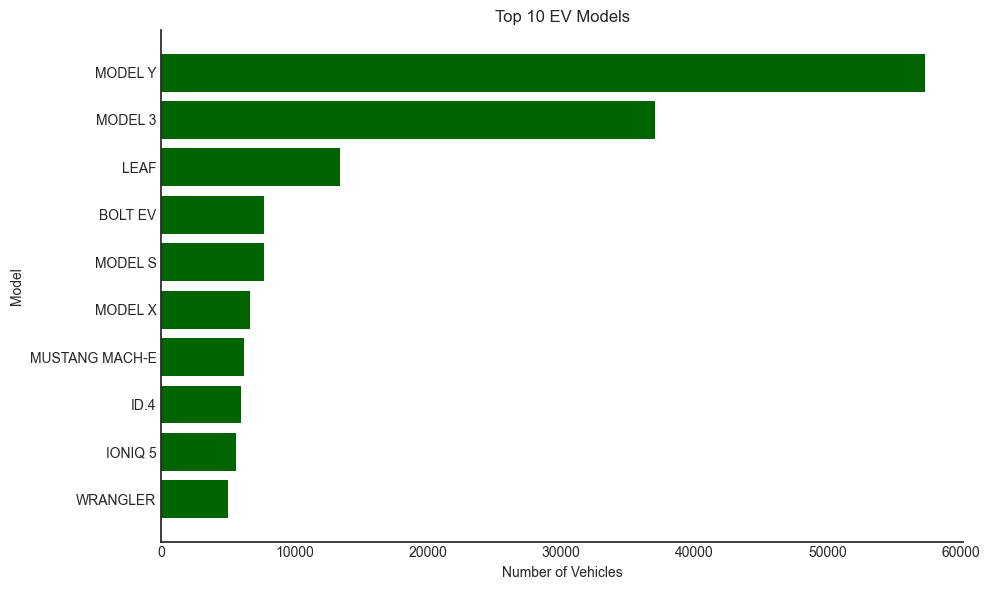

In [43]:
plt.figure(figsize=(10,6))

plt.barh(top_model.index, top_model.values,color='darkgreen')
ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('Top 10 EV Models')
plt.xlabel('Number of Vehicles')
plt.ylabel('Model')

plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()


Manufacturer Market Concentration

The manufacturer-level analysis reveals a highly concentrated EV market dominated by Tesla, which accounts for 110,508 vehicle registrations. This figure is substantially higher than the second-ranked manufacturer, Chevrolet (19,030), indicating a significant competitive gap.

Tesla alone represents a disproportionately large share of total EV registrations, while the remaining manufacturers maintain relatively comparable but significantly smaller market shares. The sharp difference between Tesla and other brands suggests strong brand dominance, likely driven by early market entry, product range, and charging infrastructure ecosystem advantages.

Overall, the EV market structure appears concentrated rather than evenly competitive.

EV Model Distribution

At the model level, the dominance pattern becomes even more evident. Tesla’s Model Y (57,298 registrations) and Model 3 (37,065 registrations) occupy the top two positions by a significant margin.

Together, these two models account for a substantial portion of total EV registrations, reinforcing Tesla’s dominant position in the market. The next most registered model, Nissan Leaf (13,450), has less than one-fourth the registrations of the leading Model Y.

This concentration suggests strong consumer preference toward specific high-performing EV models. The data indicates that a small number of models drive a large share of total market adoption, reflecting a market structure characterized by flagship product dominance.

- While the overall EV market is heavily dominated by Tesla, the competitive landscape among the remaining manufacturers appears relatively balanced. The gap between the second- and tenth-ranked brands is considerably smaller, suggesting a competitive secondary tier operating beneath a dominant market leader.

- The EV market is not only manufacturer-concentrated but also product-concentrated, with a small number of flagship models driving overall adoption.

In [44]:
make_year = df.groupby(['Model Year','Make']).size().reset_index(name='Count')
make_year

,Model Year,Make,Count
0,1999,FORD,2
1,2000,FORD,8
2,2002,TOYOTA,1
3,2003,TOYOTA,1
4,2008,TESLA,20
...,...,...,...
319,2026,RIVIAN,489
320,2026,SUBARU,33
321,2026,TESLA,9665
322,2026,TOYOTA,206


In [45]:
make_year['Year_Total'] = make_year.groupby('Model Year')['Count'].transform('sum')

make_year['Market_Share (%)'] = (make_year['Count'] / make_year['Year_Total']) * 100
top5_makes = df['Make'].value_counts().head(5).index

make_year_top5 = make_year[make_year['Make'].isin(top5_makes)]
make_year_top5.round(2)

,Model Year,Make,Count,Year_Total,Market_Share (%)
0,1999,FORD,2,2,100.00
1,2000,FORD,8,8,100.00
4,2008,TESLA,20,20,100.00
5,2010,TESLA,21,23,91.30
8,2011,CHEVROLET,57,590,9.66
...,...,...,...,...,...
304,2026,CHEVROLET,117,12851,0.91
307,2026,FORD,2,12851,0.02
312,2026,KIA,667,12851,5.19
317,2026,NISSAN,10,12851,0.08


In [46]:

top_make = df['Make'].value_counts().head(10).index

df_top = df[df['Make'].isin(top_make)]

make_year = (
    df_top.groupby(['Model Year','Make'])
    .size()
    .reset_index(name='Count')
)


In [47]:
import plotly.express as px

fig = px.bar(
    make_year,
    x="Make",
    y="Count",
    color="Make",
    animation_frame="Model Year",
    title="EV Registration Evolution by Make Over Time"
)

fig.show()


In [48]:
fig = px.line(
    make_year,
    x="Model Year",
    y="Count",
    color="Make",
    title="Trend of EV Registrations by Make"
)

fig.show()


In [49]:
# مجموع ثبت هر سال
total_per_year = make_year.groupby('Model Year')['Count'].transform('sum')

# محاسبه سهم بازار
make_year['Market_Share (%)'] = (make_year['Count'] / total_per_year) * 100


In [50]:
fig = px.bar(
    make_year,
    x="Make",
    y="Market_Share (%)",
    color="Make",
    animation_frame="Model Year",
    range_y=[0,100],
    title="Market Share Evolution of Top EV Manufacturers"
)

fig.show()


Overview:
The plot shows the trend of electric vehicle (EV) registrations over time, grouped by vehicle make, from 2000 to 2026. The x-axis represents the model year, and the y-axis represents the count of registered EVs. Each line represents a different manufacturer.

Key Observations:

Early Years (2000–2010):

EV registrations were almost negligible across all makes during this period.

Only a few makes, like ford and Toyota and Nissan, show very minimal registration counts.

Growth Phase (2010–2018):

Starting around 2010, registration numbers begin to increase slowly.

Nissan shows a noticeable spike around 2012–2013, likely due to the introduction of the Nissan Leaf.

Tesla registrations start appearing around 2012 and grow steadily.

Rapid Expansion (2018–2023):

Tesla experiences a sharp rise in registrations, peaking around 2023, reaching counts above 25,000.

Other manufacturers like Ford, Chevrolet, BMW, Hyundai, and Toyota also show growth but at much lower volumes.

The EV market is clearly expanding, with Tesla leading significantly in total registrations.

Recent Trends (2024–2026 projected):

Tesla registrations show a slight decline after the peak in 2023 but remain dominant.

Other brands appear to converge in registration counts around 1,000–4,000, showing a more competitive market.

Rivian also shows some activity in recent years, suggesting new entrants are impacting the market.

Conclusion:
The EV market has transitioned from almost zero registrations to rapid adoption within the past decade. Tesla is the clear market leader, with other manufacturers gradually increasing their market presence. The market shows signs of diversification as more makes enter and compete in the EV space.

- HHI

In [51]:

make_year['Market_Share_ratio'] = make_year['Market_Share (%)'] / 100

make_year['Squared_Share'] = make_year['Market_Share_ratio'] ** 2


hhi = (
    make_year.groupby('Model Year')['Squared_Share']
    .sum()
    .reset_index(name='HHI')
)


In [52]:
fig = px.line(
    hhi,
    x='Model Year',
    y='HHI',
    title='Market Concentration (HHI) Over Time'
)

fig.show()


# Market Concentration Analysis (HHI) for Electric Vehicle Manufacturers

## Overview

This analysis evaluates market concentration in the electric vehicle (EV) industry over time using the Herfindahl-Hirschman Index (HHI). The HHI is a widely used economic indicator to measure competition and market dominance among firms.

HHI is calculated as the sum of squared market shares of all firms in a given year:

HHI = Σ (market share_i)^2

Where market share is expressed as a proportion (0–1).

---

## Interpretation Thresholds

- HHI < 0.15 → Competitive market (low concentration)
- 0.15 ≤ HHI ≤ 0.25 → Moderately concentrated market
- HHI > 0.25 → Highly concentrated market / potential dominance

---

## Observations

### 1. Early Market Phase (1999–2010)

The HHI value remains near 1.0 during early years, indicating an extremely concentrated market structure.

Possible explanations:

- Very low number of EV manufacturers.
- Early-stage adoption with limited competition.
- Dominance by a single or very few companies.

This phase represents a nascent industry with minimal diversification.

---

### 2. Transition Phase (2011–2015)

A sharp decline in HHI is observed around 2011–2014.

Interpretation:

- Entry of multiple new manufacturers into the EV market.
- Increased competition.
- Reduction in market dominance of early leaders.

This suggests the beginning of industry expansion and competitive diversification.

---

### 3. Competitive Expansion (2015–2017)

HHI stabilizes around ~0.18–0.25.

Insights:

- Market becomes moderately concentrated.
- Several manufacturers achieve meaningful market share.
- Competitive dynamics strengthen.

---

### 4. Market Re-Concentration (2018–2021)

HHI increases significantly (~0.4+).

Possible reasons:

- Rapid growth of leading manufacturers (e.g., Tesla).
- Strong brand dominance or technological leadership.
- Uneven growth among competitors.

This indicates a shift toward partial market dominance.

---

### 5. Recent Fluctuations (2022–2026)

HHI declines again and then rises sharply near 2026.

Potential interpretations:

- Entry of new competitors reducing concentration temporarily.
- Sudden growth of specific dominant brands increasing HHI again.
- Data completeness or projection effects in latest years.

---

## Key Insights

- The EV market evolved from highly concentrated (monopolistic-like) toward competitive.
- Mid-stage competition increased significantly as new players entered.
- Recent years show signs of renewed concentration driven by market leaders.

---

## Conclusion

The EV industry demonstrates dynamic competitive evolution:

1. Early monopoly-like structure.
2. Rapid competitive expansion.
3. Emerging dominance by leading manufacturers.

Future analysis should include:

- Market leader transition analysis.
- Cohort analysis of manufacturer entry.
- Longitudinal growth comparison across brands.

---

# dominance timeline

In [53]:
# تعداد خودروها برای هر make در هر سال
make_year = (
    df.groupby(['Model Year','Make'])
    .size()
    .reset_index(name='Count')
)

# پیدا کردن لیدر هر سال (بیشترین Count)
market_leader = make_year.loc[
    make_year.groupby('Model Year')['Count'].idxmax()
]


In [54]:
import plotly.express as px

fig = px.scatter(
    market_leader,
    x="Model Year",
    y="Make",
    size="Count",
    color="Make",
    title="Market Leader Timeline (EV Market Dominance)"
)

fig.show()


In [55]:
market_leader['Leader_Change'] = (
    market_leader['Make'] != market_leader['Make'].shift(1)
)


In [56]:
fig = px.line(
    market_leader,
    x="Model Year",
    y="Count",
    color="Make",
    markers=True,
    title="Leader Performance Over Time"
)

fig.show()



# electric range analysis 

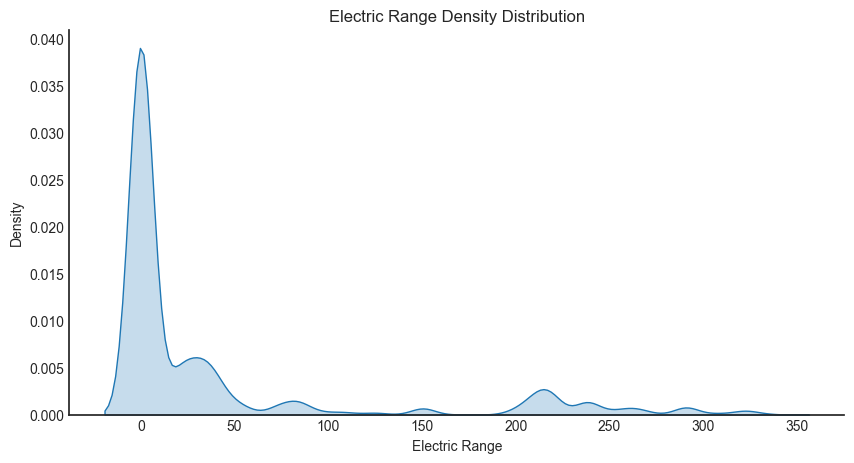

In [57]:


plt.figure(figsize=(10,5))

sns.kdeplot(
    data=df,
    x='Electric Range',
    fill=True
)
ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('Electric Range Density Distribution')
plt.show()


In [96]:
df['Electric Range'].describe().round(2)

count    271018.00
mean         39.90
std          78.77
min           0.00
25%           0.00
50%           0.00
75%          33.00
max         337.00
Name: Electric Range, dtype: float64

<Axes: xlabel='Electric Range', ylabel='Density'>

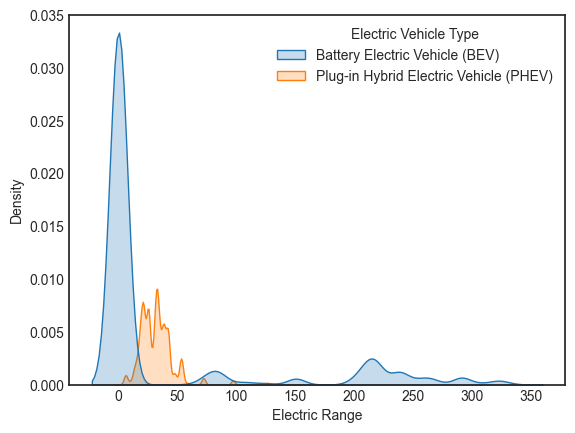

In [ ]:
#BEV VS PHEV 
sns.kdeplot(data=df, x='Electric Range', hue='Electric Vehicle Type', fill=True)

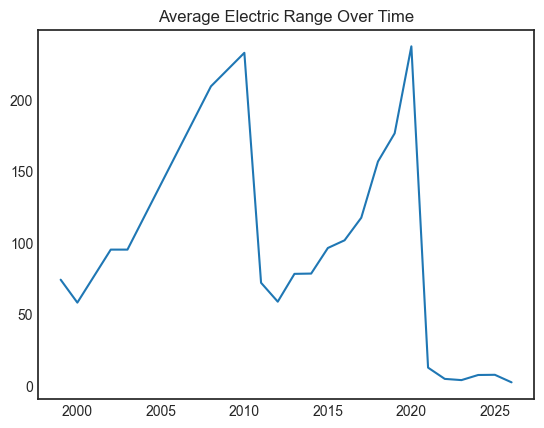

In [199]:
range_year=df.groupby('Model Year')['Electric Range'].mean().reset_index()
range_year
plt.figure()
plt.plot(range_year['Model Year'], range_year['Electric Range'])
plt.title('Average Electric Range Over Time')
plt.show()

The electric range distribution is heavily right-skewed, with more than 50% of vehicles showing zero electric range. This significantly reduces the overall mean value (39.9 miles), despite some vehicles reaching up to 337 miles.

The presence of a large number of zero values suggests that a substantial portion of the dataset consists of vehicles with either minimal electric capability (likely PHEVs) or incomplete range records.

Time-series analysis shows a fluctuating trend, with an apparent decline after 2020. However, this decline is likely driven by data incompleteness or compositional changes in vehicle types rather than actual technological regression.

In [233]:
df['Electric Range'].median()

np.float64(0.0)

In [250]:
df[df['Electric Range']==0]['Electric Vehicle Type'].value_counts()

Electric Vehicle Type
Battery Electric Vehicle (BEV)    170734
Name: count, dtype: int64

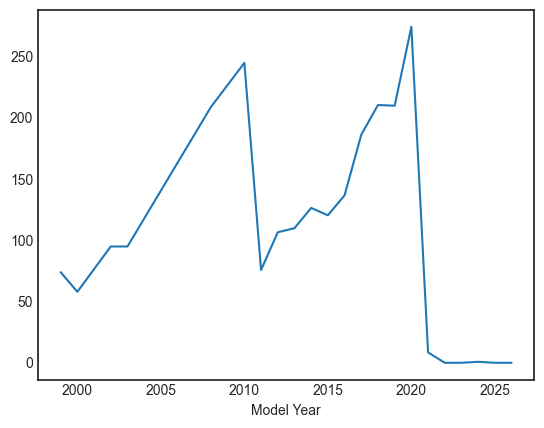

In [267]:
bev = df[df['Electric Vehicle Type'] == 'Battery Electric Vehicle (BEV)']

bev.groupby('Model Year')['Electric Range'].mean().plot()
plt.show()

In [318]:
bev = df[df['Electric Vehicle Type'] == 'Battery Electric Vehicle (BEV)']
zero_ratio = (bev['Electric Range'] == 0).mean() * 100
zero_ratio.round(0)

np.float64(79.0)

In [335]:
bev[bev['Electric Range'] == 0]['Model Year'].value_counts().head(10)

Model Year
2023    51320
2024    38634
2025    28198
2022    24838
2021    15594
2026    12072
2020       72
2019        4
2008        1
2018        1
Name: count, dtype: int64

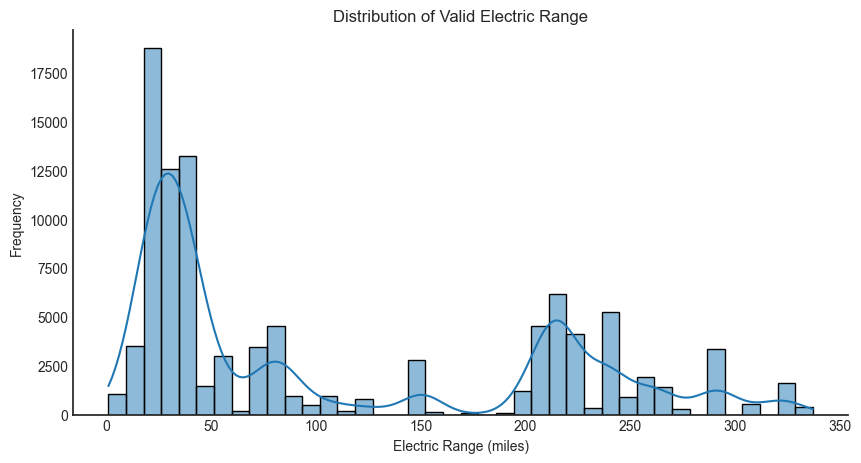

In [352]:
df_clean_range = df[df['Electric Range'] > 0].copy()


plt.figure(figsize=(10,5))

sns.histplot(
    data=df_clean_range,
    x='Electric Range',
    kde=True,
    bins=40
)

plt.title('Distribution of Valid Electric Range')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Frequency')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

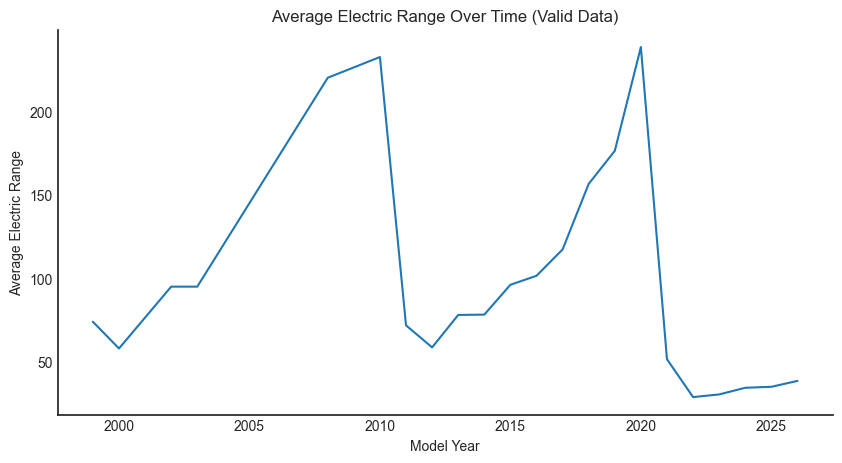

In [369]:
range_year = (
    df_clean_range
    .groupby('Model Year')['Electric Range']
    .mean()
    .reset_index()
)

plt.figure(figsize=(10,5))
plt.plot(range_year['Model Year'],
         range_year['Electric Range'])

plt.title('Average Electric Range Over Time (Valid Data)')
plt.xlabel('Model Year')
plt.ylabel('Average Electric Range')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

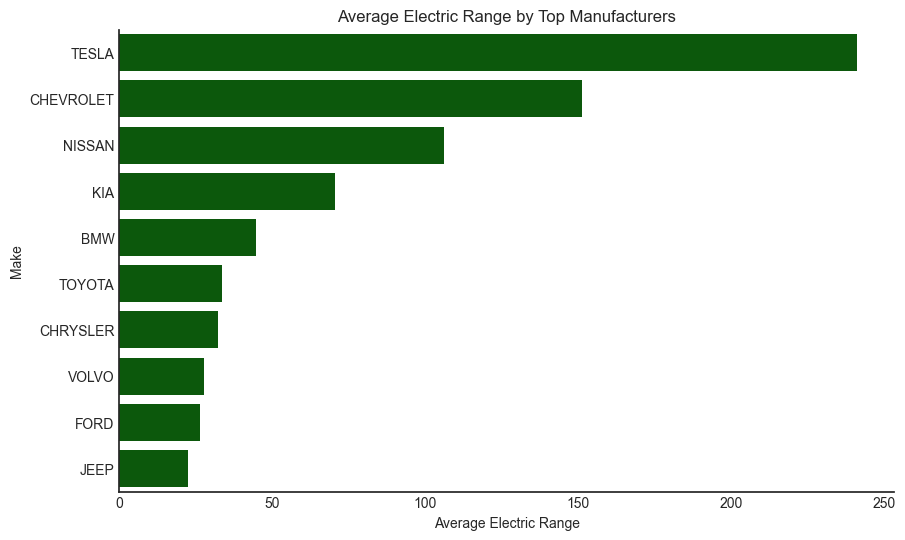

In [421]:
top_makes = df_clean_range['Make'].value_counts().head(10).index

range_make = (
    df_clean_range[df_clean_range['Make'].isin(top_makes)]
    .groupby('Make')['Electric Range']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

plt.figure(figsize=(10,6))
sns.barplot(
    data=range_make,
    x='Electric Range',
    y='Make',
    color='darkgreen'
)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('Average Electric Range by Top Manufacturers')
plt.xlabel('Average Electric Range')
plt.ylabel('Make')

plt.show()

In [455]:
df_clean_range[['Model Year','Electric Range']].corr()

,Model Year,Electric Range
Model Year,1.00000,-0.25925
Electric Range,-0.25925,1.00000


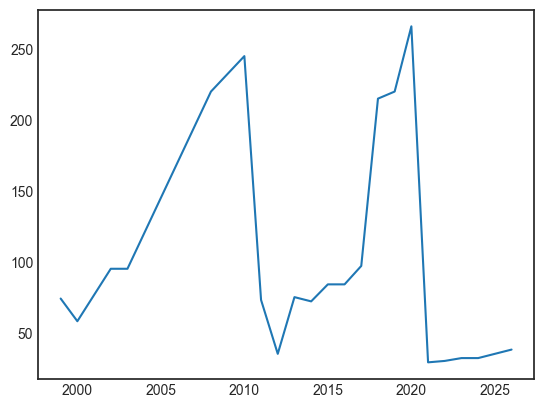

In [472]:
range_year = df_clean_range.groupby('Model Year')['Electric Range'].median().reset_index()

plt.plot(range_year['Model Year'], range_year['Electric Range'])
plt.show()

Electric Range Analysis

The Electric Range feature was initially examined to understand the technological progression of EV battery performance and its potential use as a predictive modeling target.

1. Distribution Analysis

The distribution of electric range values (excluding zero values) remains strongly right-skewed and exhibits a bimodal structure:

A large concentration of vehicles within the 0–50 mile range

A secondary concentration around 200–250 miles

This bimodal pattern reflects the structural difference between Plug-in Hybrid Electric Vehicles (PHEVs), which typically have limited electric-only range, and Battery Electric Vehicles (BEVs), which offer significantly higher ranges.

---


2. Data Quality Issue

A critical structural issue was identified:

Approximately 79% of BEV records have Electric Range recorded as zero.

The majority of these zero entries correspond to model years 2020 and later.

Since BEVs cannot technically have zero electric range, these values likely represent missing or unrecorded data rather than true measurements.

This significantly affects:

The mean electric range

Time trend analysis

Correlation results

---

3. Time Trend Analysis

Trend analysis showed:

Increase from early 2000s to around 2010

Temporary decline between 2010–2014

Growth until 2020

Sharp decline post-2020

However, the post-2020 decline is not interpreted as technological regression, but rather as a consequence of incomplete electric range reporting in recent years.

---


4. Correlation Analysis

The correlation between Model Year and Electric Range was calculated as:

-0.259

This negative correlation contradicts expected technological improvement trends and further confirms that recent data incompleteness distorts the relationship.


---


5. Conclusion

Due to the structural presence of missing electric range values—particularly in post-2020 BEV records—the dataset does not provide a reliable foundation for building a robust electric range prediction model.

Therefore:

Electric Range prediction is not pursued at this stage.

The feature is retained for descriptive insight but excluded from predictive modeling considerations.

This decision ensures methodological integrity and maintains analytical credibility.

---

# Clean Alternative Fuel Vehicle (CAFV) Eligibility

In [489]:
cafv_dist = df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()

cafv_dist

Clean Alternative Fuel Vehicle (CAFV) Eligibility
Eligibility unknown as battery range has not been researched    170734
Clean Alternative Fuel Vehicle Eligible                          76198
Not eligible due to low battery range                            24086
Name: count, dtype: int64

In [523]:
cafv_percent = df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts(normalize=True) * 100
cafv_percent.round(0)

Clean Alternative Fuel Vehicle (CAFV) Eligibility
Eligibility unknown as battery range has not been researched    63.0
Clean Alternative Fuel Vehicle Eligible                         28.0
Not eligible due to low battery range                            9.0
Name: proportion, dtype: float64

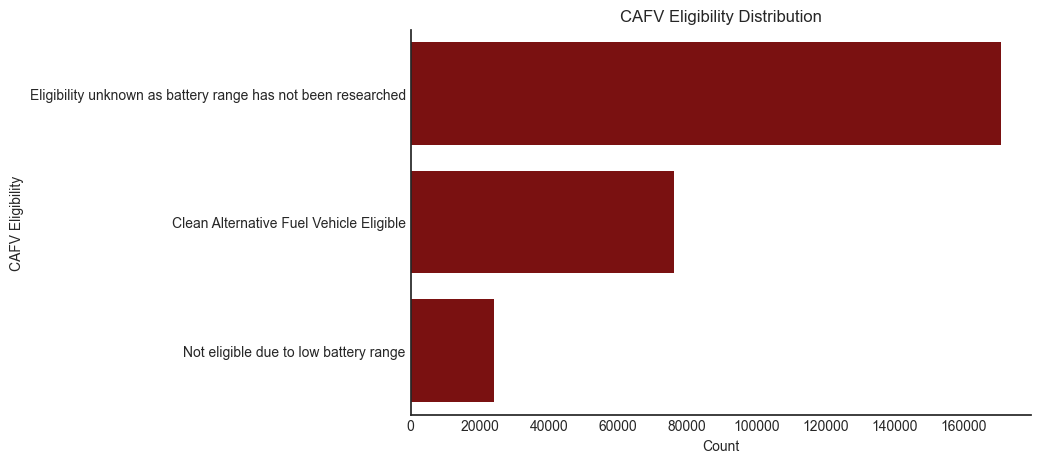

In [574]:


plt.figure(figsize=(8,5))

sns.countplot(
    data=df,
    y='Clean Alternative Fuel Vehicle (CAFV) Eligibility',
    order=df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts().index,
    color='darkred'
)

plt.title('CAFV Eligibility Distribution')
plt.xlabel('Count')
plt.ylabel('CAFV Eligibility')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

In [608]:
cafv_type = pd.crosstab(
    df['Electric Vehicle Type'],
    df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'],
    normalize='index'
) * 100

cafv_type.round(0)

Clean Alternative Fuel Vehicle (CAFV) Eligibility,Clean Alternative Fuel Vehicle Eligible,Eligibility unknown as battery range has not been researched,Not eligible due to low battery range
Electric Vehicle Type,,,
Battery Electric Vehicle (BEV),21.0,79.0,0.0
Plug-in Hybrid Electric Vehicle (PHEV),56.0,0.0,44.0


The CAFV Eligibility distribution reveals that 63% of vehicles are classified as “Eligibility Unknown,” while 28% are eligible and 9% are not eligible.

Cross-analysis with vehicle type indicates that 79% of BEVs fall under the “Unknown” category, whereas PHEVs show a clear policy-based classification (56% eligible, 44% not eligible).

This suggests that CAFV eligibility status is strongly influenced by missing electric range data in BEVs, particularly in post-2020 records.

Therefore, CAFV eligibility cannot be fully interpreted as a pure policy outcome indicator without accounting for structural data incompleteness.

For reliable policy interpretation, PHEV-based eligibility trends provide a more accurate representation.

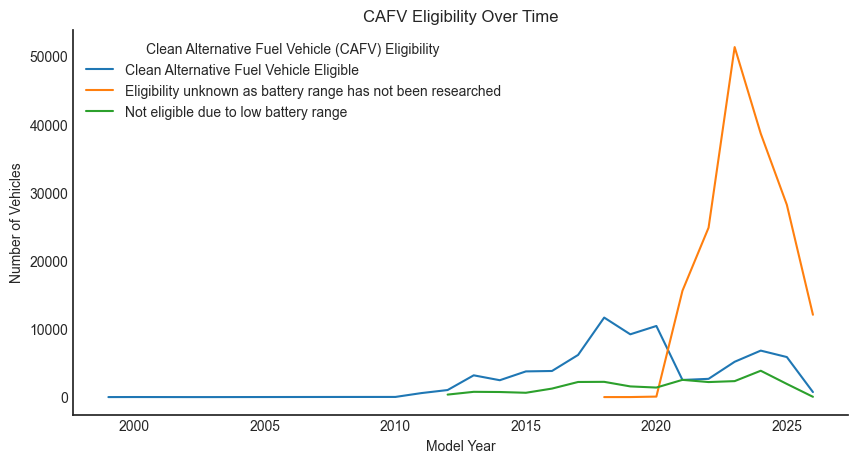

In [676]:
cafv_year = (
    df.groupby(['Model Year', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility'])
    .size()
    .reset_index(name='Count')
)

cafv_pivot = cafv_year.pivot(
    index='Model Year',
    columns='Clean Alternative Fuel Vehicle (CAFV) Eligibility',
    values='Count'
)

cafv_pivot.plot(figsize=(10,5))
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('CAFV Eligibility Over Time')
plt.ylabel('Number of Vehicles')
plt.show()

📊 CAFV Eligibility Over Time — Report
Overview

This chart illustrates the trend in Clean Alternative Fuel Vehicle (CAFV) eligibility across different vehicle model years. It categorizes vehicles into three groups:

CAFV Eligible

Eligibility Unknown (Battery range not researched)

Not Eligible due to Low Battery Range

The x-axis represents the model year (1999–2026), and the y-axis represents the number of vehicles in each eligibility category.

Key Findings
1. CAFV Eligible Vehicles

From 1999 to around 2010, CAFV-eligible vehicles were almost nonexistent.

Starting in 2011, eligibility numbers began to increase gradually.

A significant rise occurred between 2016 and 2019, reaching a peak of around 12,000 vehicles.

After a drop in 2020, eligibility rebounded slightly in 2023–2024.

By 2026, the number dropped sharply, likely due to incomplete data for recent model years.

Interpretation:
This trend reflects the growing adoption of electric vehicles (EVs) and improvements in battery technology during the late 2010s.

2. Eligibility Unknown

This category appeared mainly from 2019 onward.

It increased dramatically, peaking at over 50,000 vehicles in 2023.

After 2023, the number declined but remained relatively high.

Interpretation:
This suggests that many newer vehicles have not yet been fully evaluated for CAFV eligibility, possibly due to rapid market expansion and data processing delays.

3. Not Eligible Due to Low Battery Range

This category started appearing around 2012.

Numbers remained relatively low compared to other categories.

A moderate peak occurred around 2024, followed by a decline.

Interpretation:
As battery technology improved, fewer vehicles failed eligibility due to insufficient range.

Overall Conclusion

The chart highlights the evolution of clean vehicle eligibility over time:

The rise in CAFV-eligible vehicles reflects technological progress and increased EV adoption.

The large spike in unknown eligibility in recent years indicates a fast-growing market where eligibility assessment is still catching up.

The relatively low number of non-eligible vehicles suggests improvements in battery performance.

Implications

The future outlook for CAFV eligibility appears positive.

Continued advancements in battery technology will likely increase eligibility rates.

Better and faster evaluation processes will reduce the “unknown” category.

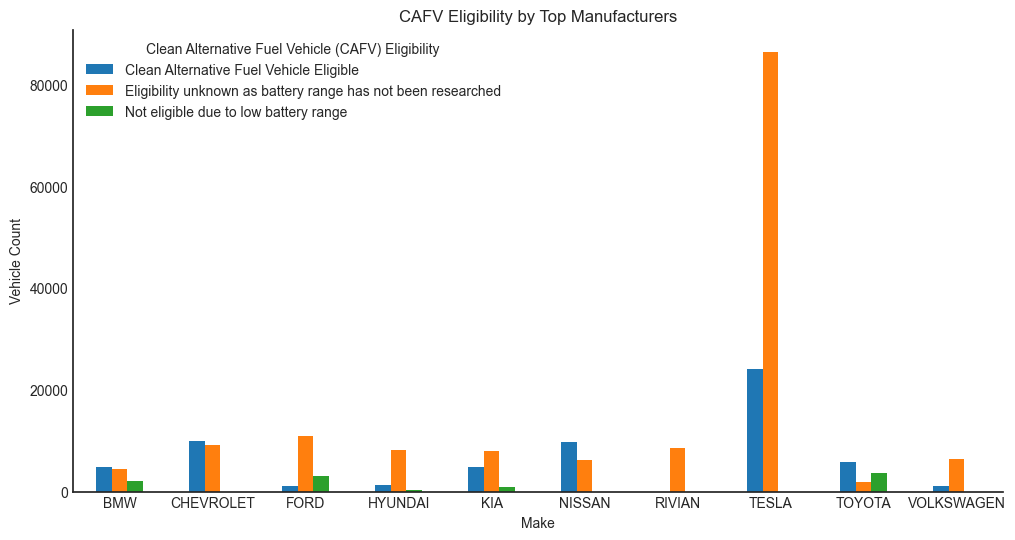

In [711]:
cafv_make = (
    df.groupby(['Make','Clean Alternative Fuel Vehicle (CAFV) Eligibility'])
    .size()
    .reset_index(name='Count')
)

top_makes = df['Make'].value_counts().head(10).index

cafv_make_top = cafv_make[cafv_make['Make'].isin(top_makes)]

pivot_make = cafv_make_top.pivot(
    index='Make',
    columns='Clean Alternative Fuel Vehicle (CAFV) Eligibility',
    values='Count'
)

pivot_make.plot(kind='bar', figsize=(12,6))
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('CAFV Eligibility by Top Manufacturers')
plt.ylabel('Vehicle Count')
plt.xticks(rotation=0)
plt.show()

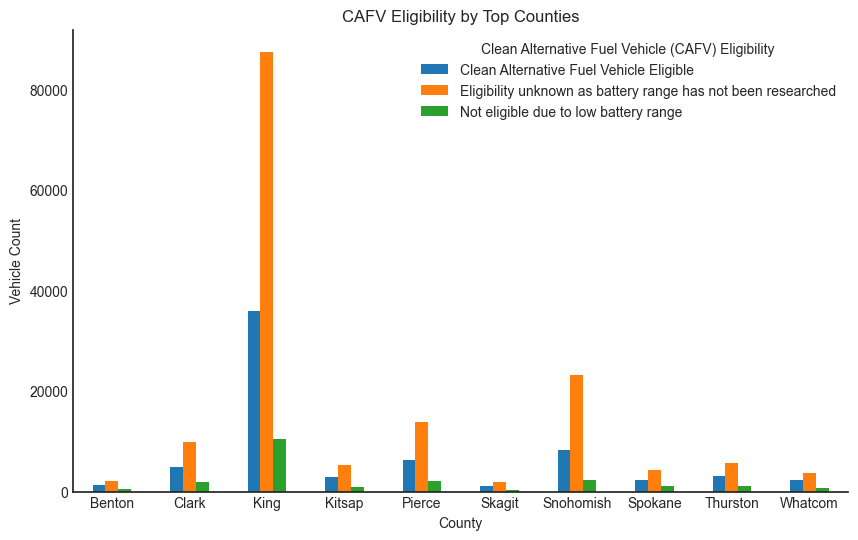

In [762]:
cafv_county = (
    df.groupby(['County','Clean Alternative Fuel Vehicle (CAFV) Eligibility'])
    .size()
    .reset_index(name='Count')
)

top_counties = df['County'].value_counts().head(10).index

cafv_county_top = cafv_county[cafv_county['County'].isin(top_counties)]

pivot_county = cafv_county_top.pivot(
    index='County',
    columns='Clean Alternative Fuel Vehicle (CAFV) Eligibility',
    values='Count'
)

pivot_county.plot(kind='bar', figsize=(10,6))
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('CAFV Eligibility by Top Counties')
plt.ylabel('Vehicle Count')
plt.xticks(rotation=0)
plt.show()

## CAFV Eligibility by Top Manufacturers — Report

### Overview
This chart presents the distribution of vehicles by **Clean Alternative Fuel Vehicle (CAFV) eligibility status** among the top automotive manufacturers. The manufacturers included are BMW, Chevrolet, Ford, Hyundai, Kia, Nissan, Rivian, Tesla, Toyota, and Volkswagen.

The vehicles are classified into three categories:

1. CAFV Eligible  
2. Eligibility Unknown (Battery range not researched)  
3. Not Eligible due to Low Battery Range  

The y-axis shows the number of vehicles, while the x-axis shows the manufacturers.

---

### Key Findings

#### 1. Tesla Dominates in Total Vehicles but Has High Unknown Eligibility

Tesla has by far the highest total number of vehicles among all manufacturers.

- Tesla has approximately **24,000 CAFV eligible vehicles**, which is the highest among all brands.
- However, it also has an extremely large number of **vehicles with unknown eligibility (around 87,000)**.
- Tesla has **almost no vehicles in the not eligible category**.

**Interpretation:**  
This suggests Tesla produces a large number of electric vehicles with sufficient range, but many newer models may not yet have confirmed eligibility status.

---

#### 2. Chevrolet and Nissan Show Strong CAFV Eligibility

Both Chevrolet and Nissan have strong performance in CAFV eligibility.

- Chevrolet has around **10,000 eligible vehicles**, with a similar number in unknown status.
- Nissan also has around **10,000 eligible vehicles**, showing strong compliance with CAFV standards.

**Interpretation:**  
These manufacturers have been producing CAFV-qualified vehicles consistently.

---

#### 3. Traditional Manufacturers Show Mixed Results

Manufacturers such as Ford, Hyundai, Kia, Toyota, and Volkswagen show moderate performance.

- Ford has a relatively high number of **unknown and not eligible vehicles**, suggesting many models do not meet battery requirements.
- Toyota has more eligible vehicles than unknown, indicating better compliance.
- Volkswagen has relatively low eligible numbers but moderate unknown status.

**Interpretation:**  
These companies appear to be in transition toward fully compliant electric vehicle production.

---

#### 4. Rivian Shows High Unknown Status

Rivian has a significant number of vehicles in the unknown category but very few eligible vehicles.

**Interpretation:**  
This likely reflects Rivian’s status as a newer EV manufacturer with many recently released models.

---

#### 5. Not Eligible Category Is Relatively Small Overall

Across most manufacturers, the number of vehicles not eligible due to low battery range is relatively low.

**Interpretation:**  
This indicates overall improvement in battery technology across the industry.

---

### Overall Conclusion

The chart clearly shows that:

- Tesla is the dominant manufacturer in total electric vehicle volume.
- Chevrolet and Nissan are strong performers in CAFV eligibility.
- Many manufacturers still have a large number of vehicles with unknown eligibility.
- The number of vehicles failing eligibility due to battery limitations is relatively small.

---

### Implications

- Electric vehicle production is heavily concentrated among a few key manufacturers.
- Eligibility verification processes may lag behind vehicle production.
- Battery technology improvements are helping manufacturers meet CAFV requirements.
- Newer manufacturers are still in early stages of eligibility evaluation.

---


## CAFV Eligibility by Top Counties — Report

### Overview
This chart illustrates the distribution of vehicles based on **Clean Alternative Fuel Vehicle (CAFV) eligibility status** across the top counties. The counties included are Benton, Clark, King, Kitsap, Pierce, Skagit, Snohomish, Spokane, Thurston, and Whatcom.

Vehicles are categorized into three groups:

1. CAFV Eligible  
2. Eligibility Unknown (Battery range not researched)  
3. Not Eligible due to Low Battery Range  

The x-axis represents counties, and the y-axis represents the number of vehicles.

---

### Key Findings

#### 1. King County Has the Highest Vehicle Concentration

King County has significantly higher numbers than all other counties in every category.

- Around **36,000 CAFV eligible vehicles**
- Approximately **88,000 vehicles with unknown eligibility**
- About **10,000 not eligible vehicles**

**Interpretation:**  
This indicates that King County is the primary hub for electric vehicle adoption. The high unknown category suggests many newly registered vehicles are still under evaluation.

---

#### 2. Snohomish and Pierce Counties Show Strong Adoption

Snohomish and Pierce counties are the second and third highest counties.

- Snohomish has around **8,000 eligible vehicles** and **23,000 unknown**
- Pierce has around **6,500 eligible vehicles** and **14,000 unknown**

**Interpretation:**  
These counties are major contributors to electric vehicle adoption but still far behind King County.

---

#### 3. Clark County Shows Moderate Numbers

Clark County shows moderate adoption levels.

- Around **5,000 eligible vehicles**
- Around **10,000 unknown vehicles**

**Interpretation:**  
Electric vehicle adoption is growing steadily in this county.

---

#### 4. Smaller Counties Have Lower Adoption

Counties such as Kitsap, Thurston, Spokane, Whatcom, Benton, and Skagit have relatively lower vehicle counts.

- Eligible vehicles typically range between **1,000 and 4,000**
- Unknown eligibility still represents a large portion

**Interpretation:**  
These counties have smaller populations and lower electric vehicle penetration.

---

#### 5. Unknown Eligibility Is the Largest Category in Most Counties

In almost all counties, the unknown eligibility category is larger than the eligible category.

**Interpretation:**  
This suggests many vehicles are new and have not yet been fully evaluated.

---

### Overall Conclusion

The chart demonstrates that:

- Electric vehicle adoption is highly concentrated in King County.
- Larger counties tend to have higher CAFV eligibility counts.
- Unknown eligibility remains a major portion across all counties.
- Smaller counties show slower adoption rates.

---

### Implications

- Urban and densely populated counties lead in EV adoption.
- Infrastructure and economic factors likely influence adoption rates.
- Eligibility assessment processes may lag behind vehicle registrations.
- EV adoption is expected to grow in smaller counties over time.

---



In [796]:
range_cafv = (
    df[df['Electric Range'] > 0]
    .groupby('Clean Alternative Fuel Vehicle (CAFV) Eligibility')['Electric Range']
    .mean()
)

range_cafv.round(0)

Clean Alternative Fuel Vehicle (CAFV) Eligibility
Clean Alternative Fuel Vehicle Eligible    135.0
Not eligible due to low battery range       21.0
Name: Electric Range, dtype: float64

In [797]:
# start EDA 
df['County'].value_counts().sort_values(ascending=False).head(10)


County
King         133810
Snohomish     33765
Pierce        22238
Clark         16693
Thurston       9841
Kitsap         9116
Spokane        7651
Whatcom        6664
Benton         3827
Skagit         3194
Name: count, dtype: int64

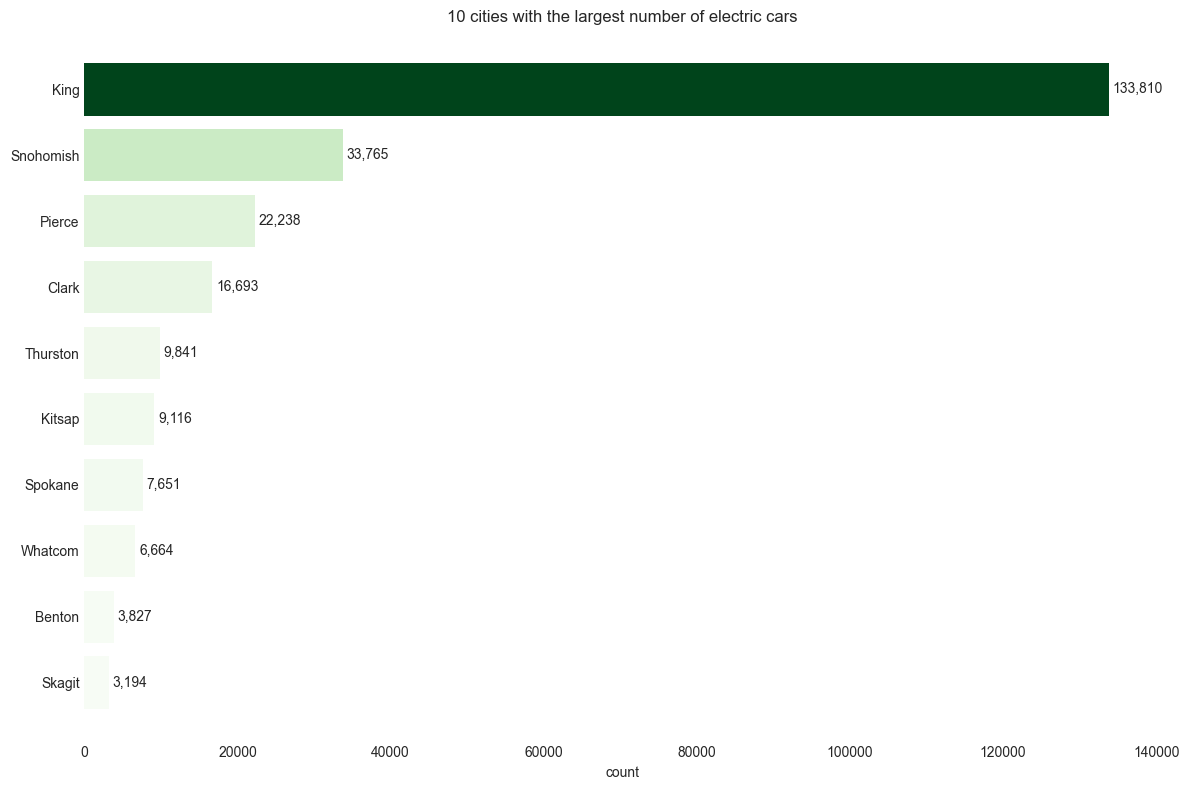

In [798]:
top10_counties = df['County'].value_counts().head(10)

norm = mcolors.Normalize(vmin=top10_counties.min(), vmax=top10_counties.max())
cmap = cm.Greens

plt.figure(figsize=(12,8))
bars = plt.barh(top10_counties.index, top10_counties.values, color=[cmap(norm(value)) for value in top10_counties])

ax = plt.gca()
for spine in ax.spines.values():
    spine.set_visible(False)

ax.tick_params(left=False, bottom=False)
plt.grid(False)
for bar in bars:
    width = bar.get_width()
    plt.text(width + 500, bar.get_y() + bar.get_height()/2,
             f'{int(width):,}', va='center', fontsize=10)

plt.xlabel('count')
plt.title('10 cities with the largest number of electric cars')
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()


| **County**       | **Population Estimate (2024/25)**       |                         |
| ---------------- | --------------------------------------- | ----------------------- |
| King County      | ~2,340,211 — Largest population in Washington | ([statsamerica.org][1]) |
| Pierce County    | ~941,170 — Rank 2                       | ([statsamerica.org][1]) |
| Snohomish County | ~864,113 — Rank 3                      | ([statsamerica.org][1]) |
| Clark County     | ~527,269                                | ([statsamerica.org][1]) |
| Thurston County  | ~302,912                                | ([statsamerica.org][1]) |
| Kitsap County    | ~281,420                                | ([statsamerica.org][1]) |
| Spokane County   | ~555,947                                | ([statsamerica.org][1]) |
| Whatcom County   | ~234,954                                | ([statsamerica.org][1]) |
| Benton County    | ~218,190                                | ([statsamerica.org][1]) |
| Skagit County    | ~132,736                                | ([statsamerica.org][1]) |

[1]: https://www.statsamerica.org/USCP/r_output.aspx?code_set=0&element_type=1&geo_set=53015&item_set=6000&rank_type=C&time_set=uspr_pop_time1&utm_source=chatgpt.com "USA Counties in Profile: StatsAmerica"


To understand the spatial distribution of electric vehicles, an analysis was conducted on the number of EV registrations across different counties. This step aims to identify regions with the highest concentration of electric vehicles and detect potential geographic adoption patterns.

Understanding county-level distribution provides insight into regional demand, infrastructure development,and possible socioeconomic influences on EV adoption.

- to evaluate electric vehicle adoption relative to population, the top counties by EV count were compared with county population estimates.

The counties with the highest EV registrations — such as King, Pierce, and Snohomish — also rank among the most populous in the state of Washington. For example, King County (approximately 2.34 million residents) is the largest county by population and has the highest EV count in the dataset. Similarly, Pierce and Snohomish counties are among the top three in both population and EV registrations.

This suggests that the absolute number of EVs in a county correlates strongly with overall population size. However, some smaller counties such as Skagit and Benton appear in the top EV counts despite having lower populations, indicating potentially higher relative adoption or other demographic and infrastructure factors worth further analysis.

Population data was based on U.S. Census Bureau estimates and recent demographic records.

In [799]:
df['County_State'] = df['County'] + ', ' + df['State']

In [800]:
(df[['County', 'State', 'County_State']].head())


,County,State,County_State
0,Kitsap,WA,"Kitsap, WA"
1,Kitsap,WA,"Kitsap, WA"
2,King,WA,"King, WA"
3,Yakima,WA,"Yakima, WA"
4,King,WA,"King, WA"


In [801]:

population_data = {
    'County': [
        'King', 'Pierce', 'Snohomish', 'Clark', 'Thurston',
        'Kitsap', 'Spokane', 'Whatcom', 'Benton', 'Skagit'
    ],
    'Population': [
        2340211, 941170, 864113, 527269, 302912,
        281420, 555947, 234954, 218190, 132736
    ]
}

df_pop = pd.DataFrame(population_data)
df_pop


,County,Population
0,King,2340211
1,Pierce,941170
2,Snohomish,864113
3,Clark,527269
4,Thurston,302912
5,Kitsap,281420
6,Spokane,555947
7,Whatcom,234954
8,Benton,218190
9,Skagit,132736


In [802]:
ev_counts = df.groupby('County').size().reset_index(name='EV_Count')
ev_counts

,County,EV_Count
0,Ada,1
1,Adams,118
2,Alachua,1
3,Alameda,9
4,Albemarle,1
...,...,...
241,Williamson,4
242,Yakima,1897
243,Yolo,1
244,York,4


In [803]:
merged = pd.merge(ev_counts, df_pop, on='County', how='left')
merged

,County,EV_Count,Population
0,Ada,1,NaN
1,Adams,118,NaN
2,Alachua,1,NaN
3,Alameda,9,NaN
4,Albemarle,1,NaN
...,...,...,...
241,Williamson,4,NaN
242,Yakima,1897,NaN
243,Yolo,1,NaN
244,York,4,NaN


In [804]:
merged['EV_per_1000'] = (merged['EV_Count'] / merged['Population']) * 1000
result = merged.sort_values('EV_per_1000', ascending=False)
print(result[['County', 'EV_Count', 'Population', 'EV_per_1000']])


         County  EV_Count  Population  EV_per_1000
116        King    133810   2340211.0    57.178605
206   Snohomish     33765    864113.0    39.074751
224    Thurston      9841    302912.0    32.487983
118      Kitsap      9116    281420.0    32.392865
47        Clark     16693    527269.0    31.659362
..          ...       ...         ...          ...
241  Williamson         4         NaN          NaN
242      Yakima      1897         NaN          NaN
243        Yolo         1         NaN          NaN
244        York         4         NaN          NaN
245        Yuba         1         NaN          NaN

[246 rows x 4 columns]


# Electric Vehicle Adoption Analysis by County  
## Washington State

---

## Objective

The purpose of this analysis was to evaluate electric vehicle (EV) adoption across the top 10 most populated counties in Washington State by comparing both total EV registrations and EV adoption rates per capita.

---

## Methodology

- EV counts were aggregated by **County**.
- Population data for the top 10 counties were collected.
- The EV adoption rate was calculated using the following formula:

\[
EV\ per\ 1000\ residents = \frac{EV\ Count}{Population} \times 1000
\]

This metric allows for a fair comparison across counties with different population sizes by normalizing EV demand relative to population.

---

## Key Findings

- **King County** has the highest total number of EV registrations.
- After adjusting for population size, **King County also maintains the highest EV adoption rate per 1,000 residents**.
- This indicates that EV adoption in King County is not only driven by its larger population but also by stronger per-capita demand.

---

## Interpretation

The results suggest that **King County** is the leading EV adoption hub in Washington State. This may be attributed to:

- Higher urbanization (Seattle metropolitan area)
- Greater environmental awareness
- Higher median income levels
- Better availability of EV charging infrastructure

---

## Conclusion

Even after normalizing by population size, King County demonstrates the strongest relative demand for electric vehicles among the analyzed counties. This highlights its role as a central market for EV growth and infrastructure investment in Washington State.


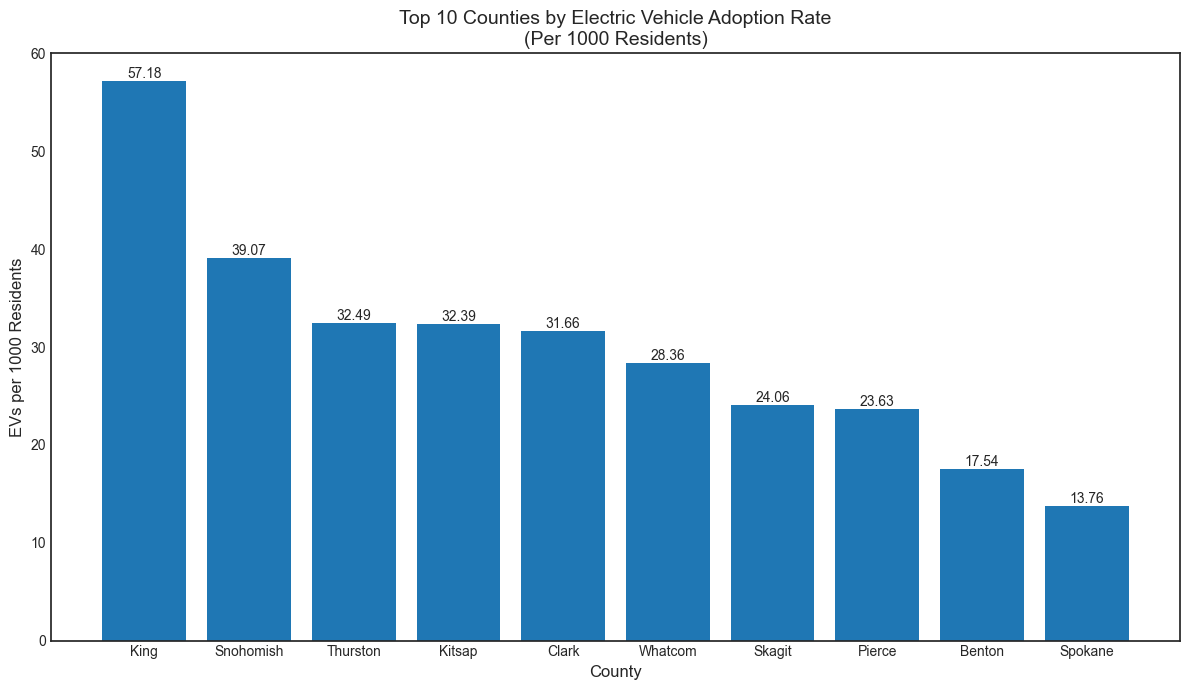

In [805]:
top10 = result.sort_values('EV_per_1000', ascending=False).head(10)
plt.figure(figsize=(12,7))
bars = plt.bar(top10['County'], top10['EV_per_1000'])
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height:.2f}',
        ha='center',
        va='bottom'
    )
plt.xticks(rotation=0
           )
plt.ylabel("EVs per 1000 Residents", fontsize=12)
plt.xlabel("County", fontsize=12)
plt.title("Top 10 Counties by Electric Vehicle Adoption Rate\n(Per 1000 Residents)", fontsize=14)
plt.tight_layout()
plt.show()


---

In [806]:
Top10_Cityhead=df['City'].value_counts(ascending=False).head(10)
Top10_Cityhead

City
Seattle      42103
Bellevue     13122
Vancouver    10135
Redmond       9242
Bothell       8936
Kirkland      7702
Sammamish     7538
Renton        7448
Olympia       6296
Tacoma        5900
Name: count, dtype: int64

In [807]:
count_city=df['City'].value_counts(ascending=False)
treshold= 311
top_cities=count_city[count_city>treshold].index
top_cities

Index(['Seattle', 'Bellevue', 'Vancouver', 'Redmond', 'Bothell', 'Kirkland',
       'Sammamish', 'Renton', 'Olympia', 'Tacoma',
       ...
       'Lynden', 'Brier', 'Langley', 'Eastsound', 'Chehalis', 'Cle Elum',
       'Coupeville', 'Clinton', 'Sultan', 'Fall City'],
      dtype='object', name='City', length=113)

In [808]:
df['city_group'] = df['City'].apply(lambda x: x if x in top_cities else 'Other')


In [809]:
city_county = df.groupby(['city_group', 'County']).size().reset_index(name='Count')
city_county.head(20).sort_values(ascending=False,by='Count')


,city_group,County,Count
9,Bellevue,King,13120
17,Bothell,Snohomish,7063
12,Bellingham,Whatcom,4495
5,Auburn,King,2715
7,Bainbridge Island,Kitsap,2374
18,Bremerton,Kitsap,2092
16,Bothell,King,1873
15,Bonney Lake,Pierce,1691
1,Anacortes,Skagit,996
8,Battle Ground,Clark,970


In [810]:
top10 = city_county.sort_values(by='Count', ascending=False).head(10)


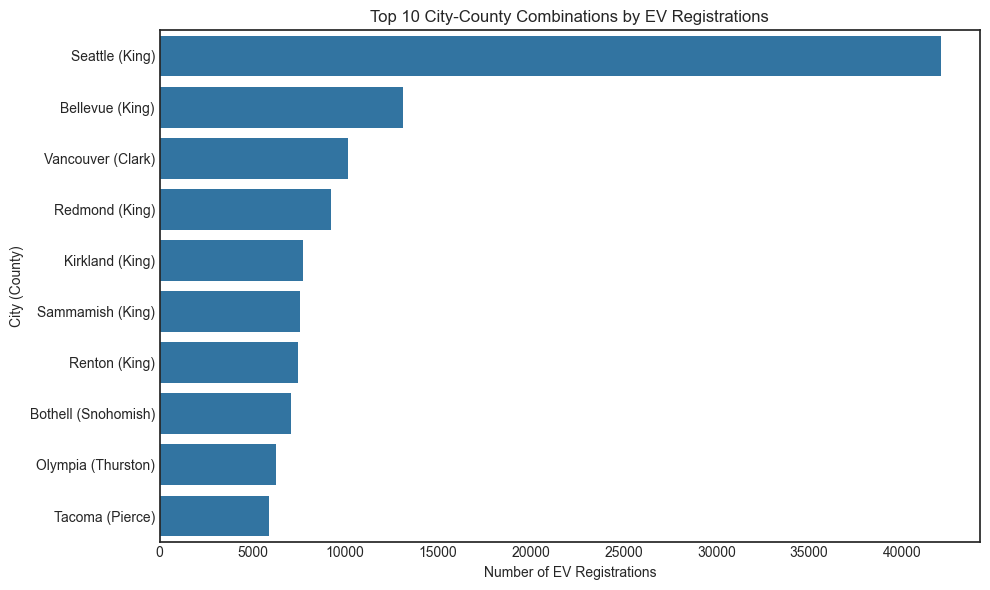

In [811]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=top10,
    y=top10['city_group'] + " (" + top10['County'] + ")",
    x='Count'
)
plt.title('Top 10 City-County Combinations by EV Registrations')
plt.xlabel('Number of EV Registrations')
plt.ylabel('City (County)')
plt.tight_layout()
plt.show()


Top City–County EV Registrations Analysis

A bar chart visualization of the top 10 city–county combinations reveals that the highest EV registrations are concentrated primarily in King County and surrounding urban areas. Cities such as Bellevue (King County), Bothell (Snohomish County), and Bellingham (Whatcom County) show significantly higher EV counts compared to other regions.

Several factors may explain this concentration:

- Economic Strength: Many of these cities are located in economically strong regions with higher median household incomes.

- Technology Sector Presence: Cities like Seattle, Bellevue, and Redmond are major technology hubs, hosting companies such as Amazon and Microsoft. Higher income levels and technological affinity likely contribute to increased EV adoption.

- Urban Infrastructure: Larger metropolitan areas typically offer better charging infrastructure and access to EV-related services.

- Environmental Awareness: Urban and tech-oriented populations may demonstrate stronger environmental consciousness and willingness to adopt sustainable technologies.

Overall, EV adoption appears to be strongly associated with urbanization, income level, and infrastructure availability.

---

In [812]:
df

,County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,County_State,city_group
0,Kitsap,Bainbridge Island,WA,98110.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,23.0,476462444,POINT (-122.521 47.62732),PUGET SOUND ENERGY INC,5.303509e+10,"Kitsap, WA",Bainbridge Island
1,Kitsap,Port Orchard,WA,98367.0,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73.0,26.0,279030461,POINT (-122.70348 47.52028),PUGET SOUND ENERGY INC,5.303509e+10,"Kitsap, WA",Port Orchard
2,King,Bothell,WA,98011.0,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73.0,1.0,232370001,POINT (-122.20563 47.76144),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10,"King, WA",Bothell
3,Yakima,Selah,WA,98942.0,2020,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,259.0,15.0,264646266,POINT (-120.53145 46.65405),PACIFICORP,5.307700e+10,"Yakima, WA",Other
4,King,Seattle,WA,98133.0,2020,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26.0,32.0,154002691,POINT (-122.33364 47.73709),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10,"King, WA",Seattle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271108,Snohomish,Woodinville,WA,98077.0,2023,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,1.0,241530824,POINT (-122.07326 47.75425),PUGET SOUND ENERGY INC,5.306105e+10,"Snohomish, WA",Woodinville
271109,Skagit,Burlington,WA,98233.0,2024,RIVIAN,EDV,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,10.0,283223496,POINT (-122.33029 48.46846),PUGET SOUND ENERGY INC,5.305795e+10,"Skagit, WA",Burlington
271110,Clark,Vancouver,WA,98682.0,2024,HONDA,PROLOGUE,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,17.0,276399231,POINT (-122.55149 45.69345),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.301104e+10,"Clark, WA",Vancouver
271111,Pierce,Tacoma,WA,98406.0,2023,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,28.0,280031559,POINT (-122.52082 47.26887),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305306e+10,"Pierce, WA",Tacoma
